## Open gain maps for flat flied correction

Charge integrating detectors, as Jungfrau (PSI) needs a flat field correction of the raw data to account for the detector artefacts. For this dark runs (raw images without X-rays) are subtracted from the raw data and divided by the gain maps. Jungfrau has a dynamic gain switching between the 3 different gains. The gain maps are written in .bin files 
(binary). This is how one can open the gain maps for each gain of Jungfrau.
Warning: The panels order can change depending on how the raw data is being saved. Careful check is needed to apply the gain map to the corresponding panel as it appears in the raw file.

More information: 
- https://www.psi.ch/en/lxn/jungfrau
- https://github.com/omdevteam/om/blob/master/src/om/tools/jungfrau_dark.py
- https://rtd.xfel.eu/docs/jungfrau-detector-documentation/en/latest/general_introduction.html

In [31]:
file_path="/path/to//gainMaps_M00*.bin"

In [13]:
import glob
import matplotlib.pyplot as plt
import h5py
from typing import BinaryIO
import numpy as np

In [14]:
gain_filenames = glob.glob(f"{file_path}*")

In [16]:
num_panels: int = 2
panel_id: int
gain = np.ndarray((3, 512 * num_panels, 1024), dtype=np.float64)

for panel_id in range(num_panels):
        gain_file: BinaryIO = open(gain_filenames[panel_id], "rb")
        gain_mode: int
        for gain_mode in range(3):
            gain[gain_mode, 512 * panel_id : 512 * (panel_id + 1), :] = np.fromfile(
                gain_file, dtype=np.float64, count=1024 * 512
            ).reshape(512, 1024)
        gain_file.close()

Gain 0 mean value: 41.34547211911013


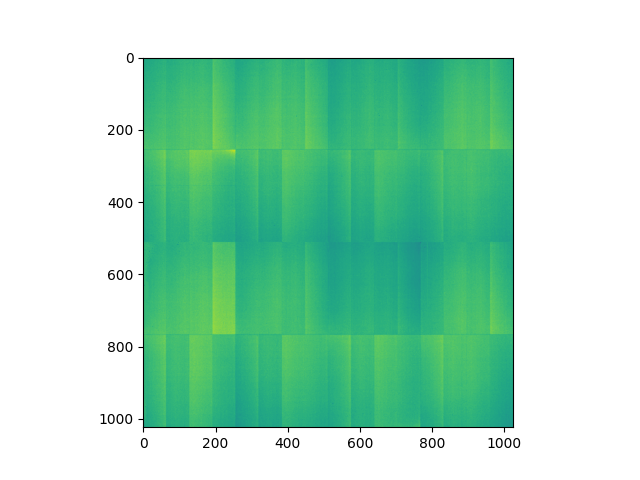

In [28]:
%matplotlib widget
plt.close()
plt.imshow(gain[0])
print(f"Gain 0 mean value: {np.mean(gain[0])}")
plt.show()

Gain 1 mean value:-1.4093198770918163


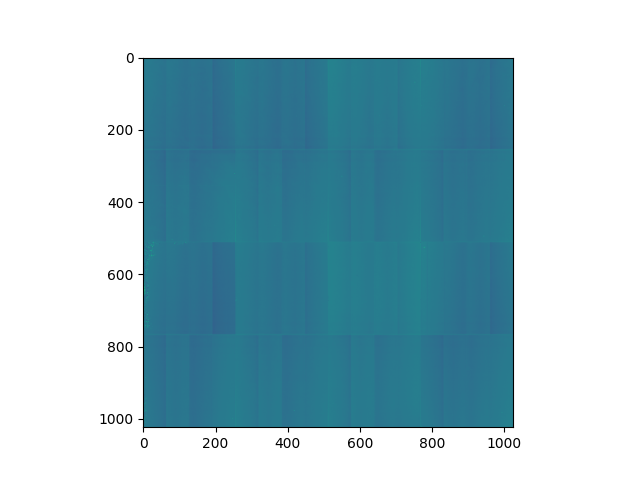

In [29]:
%matplotlib widget
plt.close()
plt.imshow(gain[1])
print(f"Gain 1 mean value:{np.mean(gain[1])}")
plt.show()

Gain 2 mean value:-0.11194753535468958


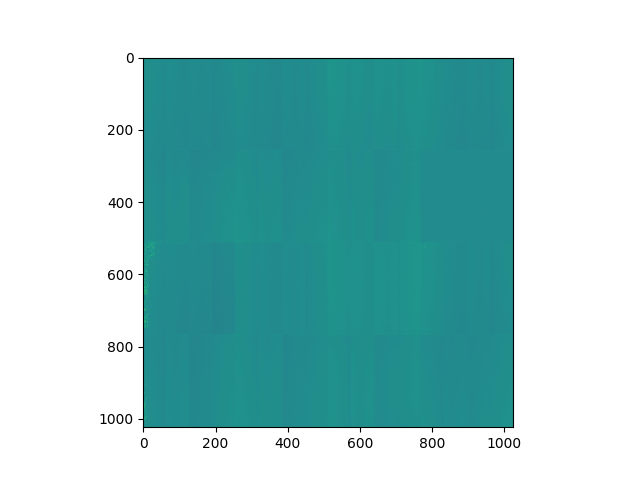

In [30]:
%matplotlib widget
plt.close()
plt.imshow(gain[2])
print(f"Gain 2 mean value:{np.mean(gain[2])}")
plt.show()